# Advanced Machine Learning
## Project 1 - Optimization Algorithms
### Authors: Bartosz Grabek, Izabela Telejko, Grzegorz Zbrzeżny

In [13]:
import numpy as np
from utils.train_functions import cv
from utils.preprocess_functions import(
    preprocess_booking,
    preprocess_churn,
    preprocess_employee,
    preprocess_challenger,
    preprocess_jungle,
    preprocess_water
)
from utils.IWLS import IWLS
from utils.GD import GD
from utils.plots import plot_figures_for_cv

### TODO:
Some columns in X_challenger and X_jungle have only 0 values

In [14]:
sgd_acc_list, adam_acc_list, iwls_acc_list, l_iwls_vals_list, l_sgd_vals_list, l_adam_vals_list = cv(preprocess_churn)

CV fold 1
Removing multicolinear columns in churn dataset...


Epochs: 100%|██████████| 100/100 [00:02<00:00, 35.75it/s]


Balanced accuracy of GD without optimizer is: 0.5319148936170213
Balanced accuracy of SGD with ADAM is: 0.7381796690307328
Balanced accuracy of IWLS is: 0.7242907801418439
Balanced accuracy of LR from Scikit is 0.7312352245862884
CV fold 2
Removing multicolinear columns in churn dataset...


Epochs: 100%|██████████| 100/100 [00:02<00:00, 36.58it/s]


Balanced accuracy of GD without optimizer is: 0.6493794326241135
Balanced accuracy of SGD with ADAM is: 0.6815159574468085
Balanced accuracy of IWLS is: 0.6817375886524822
Balanced accuracy of LR from Scikit is 0.6815159574468085
CV fold 3
Removing multicolinear columns in churn dataset...


Epochs: 100%|██████████| 100/100 [00:02<00:00, 37.54it/s]


Balanced accuracy of GD without optimizer is: 0.592956271275203
Balanced accuracy of SGD with ADAM is: 0.6368159203980099
Balanced accuracy of IWLS is: 0.6468970934799686
Balanced accuracy of LR from Scikit is 0.6468970934799686
CV fold 4
Removing multicolinear columns in churn dataset...


Epochs: 100%|██████████| 100/100 [00:02<00:00, 35.97it/s]


Balanced accuracy of GD without optimizer is: 0.522263868065967
Balanced accuracy of SGD with ADAM is: 0.5662668665667167
Balanced accuracy of IWLS is: 0.5856071964017991
Balanced accuracy of LR from Scikit is 0.5856071964017991
CV fold 5
Removing multicolinear columns in churn dataset...


Epochs: 100%|██████████| 100/100 [00:02<00:00, 36.80it/s]

Balanced accuracy of GD without optimizer is: 0.5709437086092716
Balanced accuracy of SGD with ADAM is: 0.6326986754966888
Balanced accuracy of IWLS is: 0.6602649006622516
Balanced accuracy of LR from Scikit is 0.6543874172185431


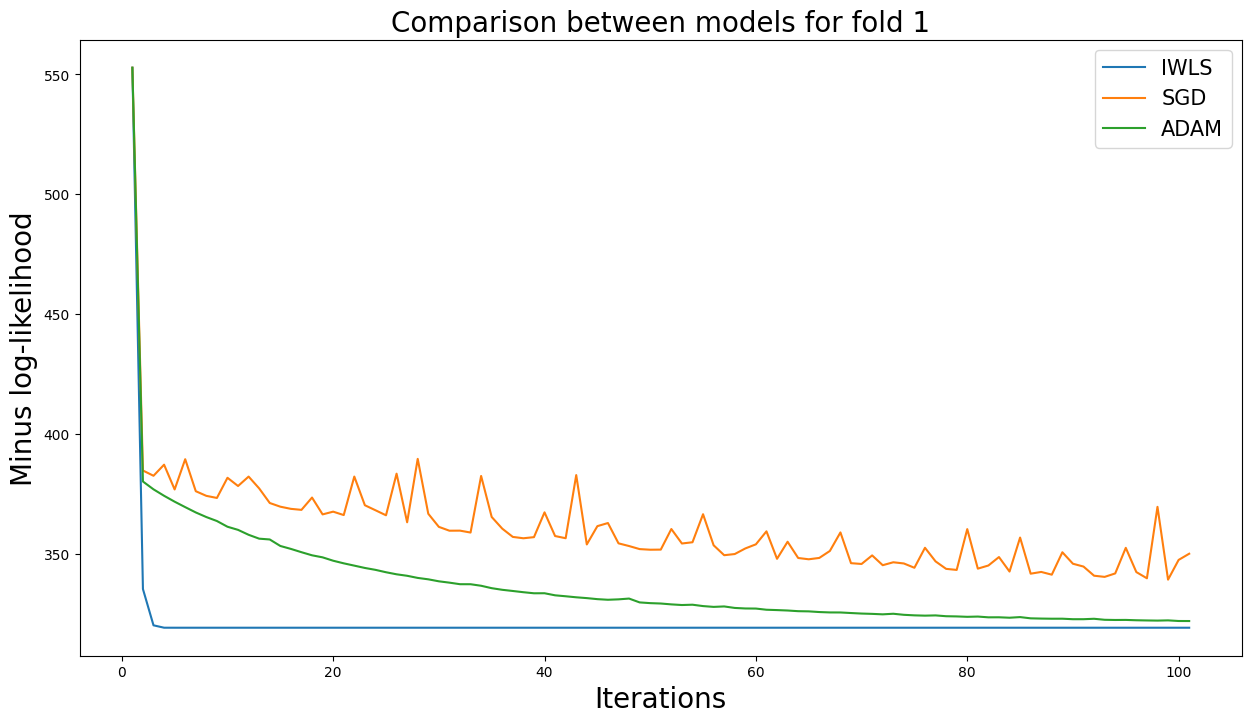

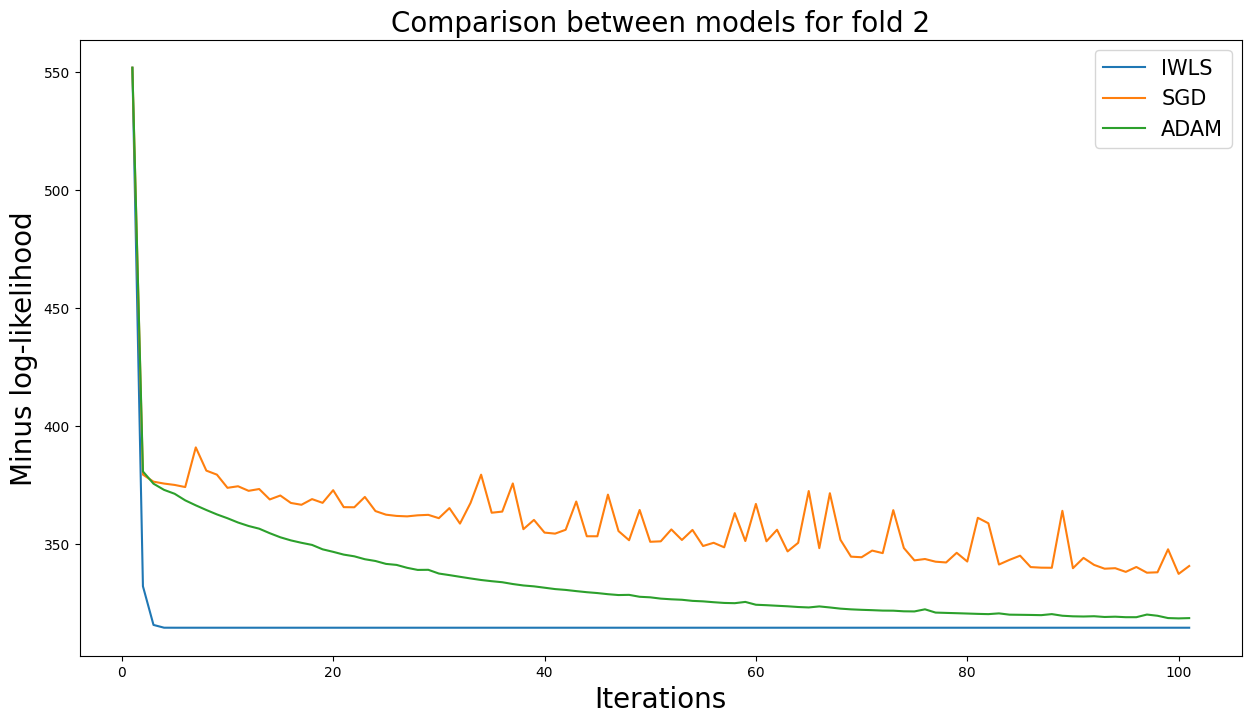

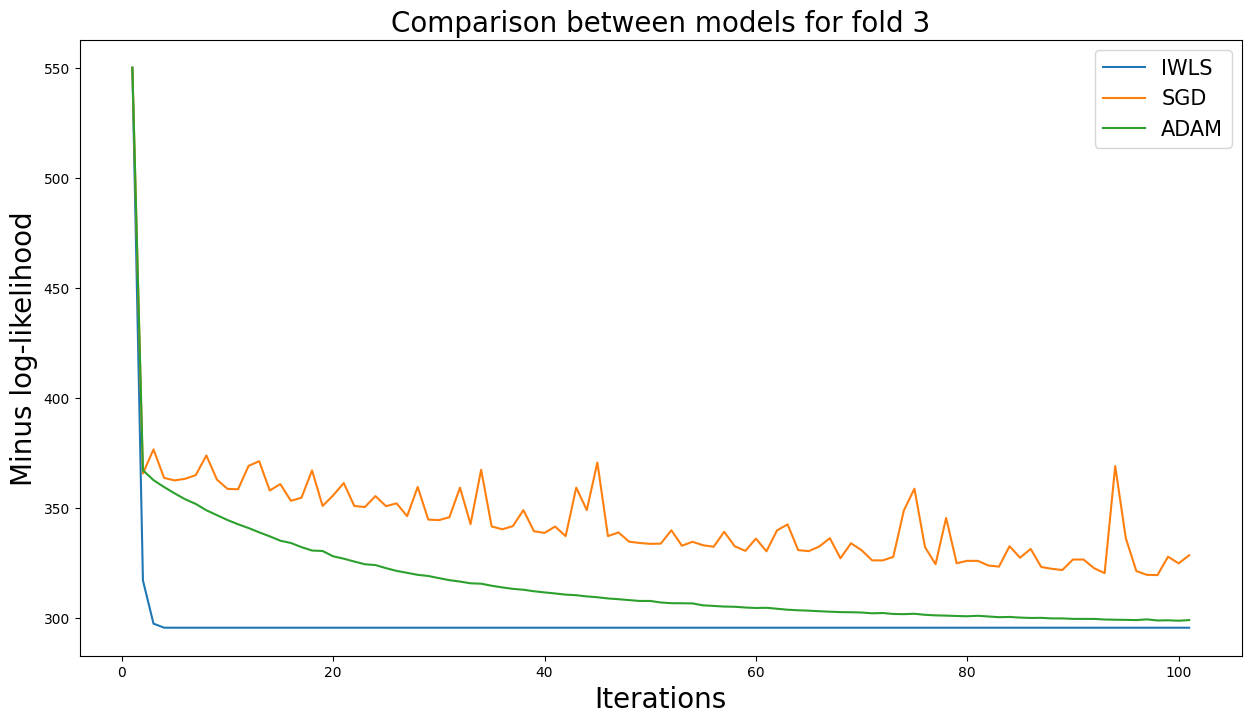

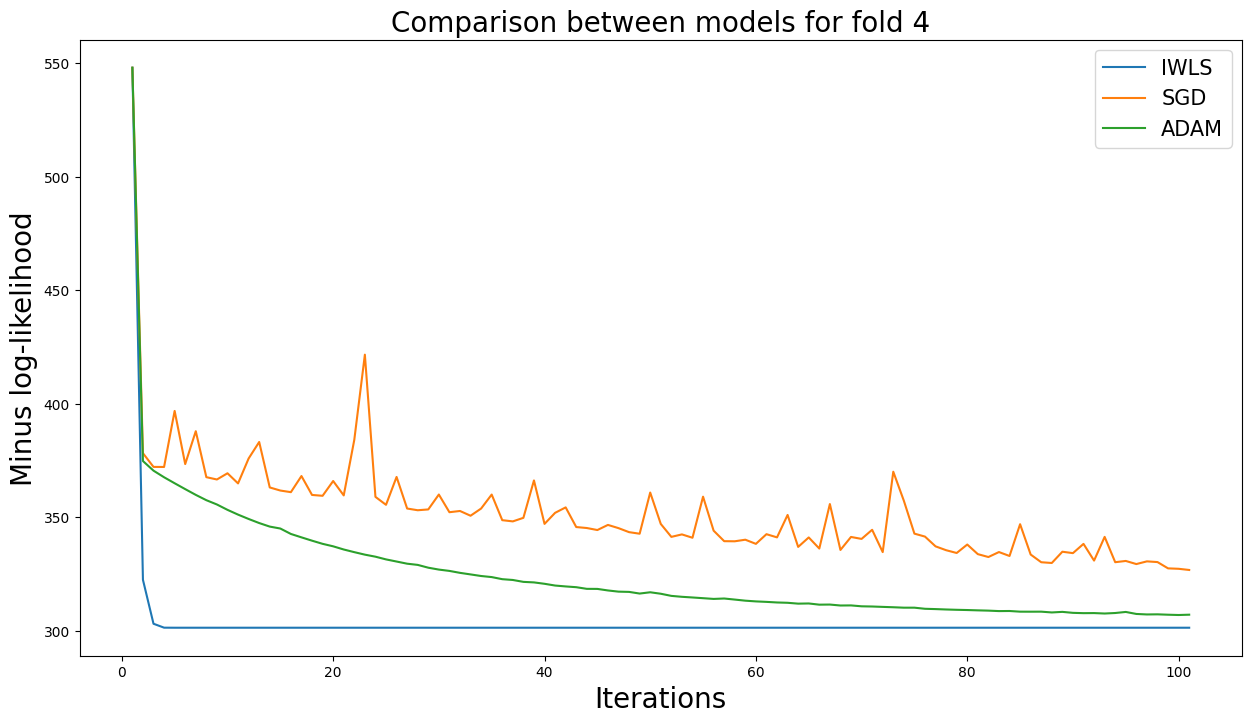

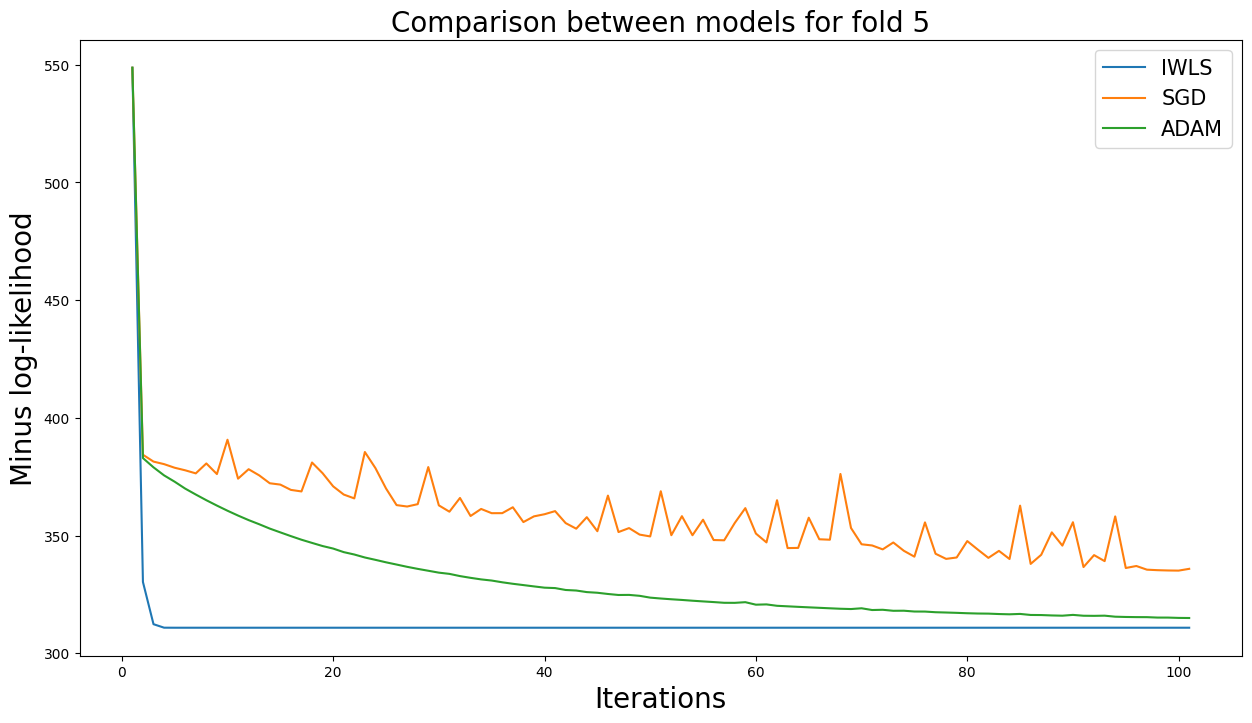

In [15]:
plot_figures_for_cv(l_iwls_vals_list, l_sgd_vals_list, l_adam_vals_list)

### Data generated from logistic model

In [9]:
beta1 = 2

n1 = 1000
x1 = np.random.exponential(1, size=n1)

n2 = 1000
x2 = np.random.exponential(1/(beta1+1), size=n2)

X = np.expand_dims(np.concatenate((x1, x2), axis=0), axis=1)
X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
y = np.expand_dims(np.concatenate((np.ones((1, n1)), np.zeros((1, n2))), axis=1)[0], 1)

In [10]:
pi = n1 / (n1 + n2)
b0 = -np.log((1 + beta1) * ((1-pi)/pi))

In [11]:
l_iwls_vals, best_beta_iwls = IWLS(X, y, n_iter=100, print_likeli=False)
l_sgd_vals, best_beta_sgd = GD(X, y, 0.0002, n_epoch=200, print_likeli=False, use_adam=False)
l_adam_vals, best_beta_adam = GD(X, y, 0.0002, n_epoch=200, print_likeli=False)

Epochs: 100%|██████████| 200/200 [00:13<00:00, 15.19it/s]


In [12]:
print(f"Theoretical betas: b0: {b0}, b1: {beta1}" )
print(f"Empirical betas for SGD without optimizers: b0: {best_beta_sgd[0]}, b1: {best_beta_sgd[1]}")
print(f"Empirical betas for SGD with ADAM: b0: {best_beta_adam[0]}, b1: {best_beta_adam[1]}")
print(f"Empirical betas for IWLS: b0: {best_beta_iwls[0][0]}, b1: {best_beta_iwls[1][0]}")

Theoretical betas: b0: -1.0986122886681098, b1: 2
Empirical betas for SGD without optimizers: b0: -1.0077377499982707, b1: 1.8241180945481685
Empirical betas for SGD with ADAM: b0: -1.0802958517222057, b1: 1.9614363655173825
Empirical betas for IWLS: b0: -1.0782573164309974, b1: 1.9543715760272262
